In [56]:
from pyparsing import nestedExpr
import csv

# def try_parse_int(s):
#     try:
#         return int(s)
#     except: #ValueError
#         return s

# set input and output file paths
file_path_in = "chorales.lisp"
file_path_out = "parsed_file.txt"
x = 0

with open(file_path_in, "r") as input_file:
    with open(file_path_out, "a") as output_file:
        
        for line in input_file:
            if line[0] == "\n":
                continue
            parsed_data = nestedExpr(opener = "(", closer = ")").parseString(line).asList()
#             print(parsed_data)
#             print("--------------------")
#             print(len(parsed_data[0]))#47
            song_num = parsed_data[0][0]
#             print("song_num: " + song_num)
#             print(parsed_data[0][0])#1
            for i in range(1, len(parsed_data[0])):
                row_text = ""  
                for j in parsed_data[0][i]:
                    row_text += str(try_parse_int(j[1])) + " "
                row_text += song_num + "\n"
#                 print(row_text)
                output_file.write(row_text)
#             print(parsed_data[0][1])#
#             print(parsed_data[0][1][0])
#             print(len(parsed_data[0][1][0]))
#             print(parsed_data[0][1][0][0])
#             print(parsed_data[0][1][0][1])
#             print(parsed_data[0][46])
            x += 1
print("total number of the songs: " + str(x))





total number of the songs: 100


In [2]:
import pandas as pd
file_path_out = "parsed_file.txt"
data = pd.read_csv(file_path_out, sep=" ", header=0)
data.shape

# hist()

(9386, 7)

In [103]:
data.head(5)

,start time,pitch,duration,key sign,time sign,fermata,chorale number
0,8,67,4,1,12,0,1
1,12,67,8,1,12,0,1
2,20,74,4,1,12,0,1
3,24,71,6,1,12,0,1
4,30,69,2,1,12,0,1


In [31]:
uniq = data.groupby('chorale number')[['time sign']].nunique()
# print(uniq)
for i in range(len(uniq)):
    if uniq.iloc[i,0] != 1:
        print(uniq.iloc[i,0])
# so in one song, only one time sign

In [34]:
uniq1 = data.groupby('chorale number')[['key sign']].nunique()
# print(uniq)
for i in range(len(uniq1)):
    if uniq1.iloc[i,0] != 1:
        print(uniq1.iloc[i,0])
# so in one song, only one key sign

Because in one song, only one key sign and time sign. I will not predict key sign and time sign. These two should be given when generate songs.

(array([2118., 1760., 1532.,    0., 1036., 1354.,  572.,  572.,  254.,
         188.]),
 array([  1. ,  29.4,  57.8,  86.2, 114.6, 143. , 171.4, 199.8, 228.2,
        256.6, 285. ]),
 <BarContainer object of 10 artists>)

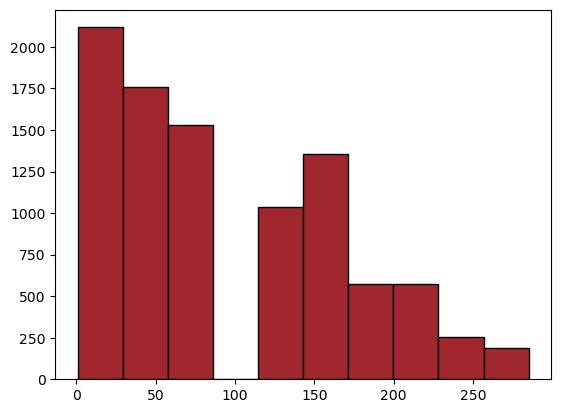

In [65]:
import matplotlib.pyplot as plt
import numpy as np

random_color = np.random.rand(3)
plt.hist(data.iloc[:,6], color=random_color, edgecolor='k')

In [93]:
print(data.iloc[:,[6]])

                   6
0     chorale number
1                  1
2                  1
3                  1
4                  1
...              ...
9382             285
9383             285
9384             285
9385             285
9386             285

[9387 rows x 1 columns]


In [106]:
max_value = data[['chorale number']].max()
print("The total number of chorales is: " + str(max_value.iloc[0]))

The total number of chorales is: 285


In [4]:
max_start_time = data[['start time']].max()
print("The maximum start time is: " + str(max_start_time.iloc[0]))

The maximum start time is: 444


In [11]:
import pandas as pd
max_pitch = data[['pitch']].max()
min_pitch = data[['pitch']].min()
print("The maximum and the minimum pitchs are %s, %s"  %(str(max_pitch.iloc[0]), str(min_pitch.iloc[0])) )
# # convert numpy array to pd to use unique()
# pd_data = pd.Series(data)
# pitch_uniq = pd_data[['pitch']].unique()
# print("Unique categories of pitch:" , pitch_uniq)

The maximum and the minimum pitchs are 79, 60


In [7]:
max_duration = data[['duration']].max()
min_duration = data[['duration']].min()
print("The maximum and the minimum duration are %s, %s"  %(str(max_duration.iloc[0]), str(min_duration.iloc[0])) )

The maximum and the minimum duration are 16, 1


In [8]:
max_key_sign = data[['key sign']].max()
min_key_sign = data[['key sign']].min()
print("The maximum and the minimum key sign are %s, %s"  %(str(max_key_sign.iloc[0]), str(min_key_sign.iloc[0])) )

The maximum and the minimum key sign are 4, -4


In [3]:
col_name = data.columns
print(col_name)

Index(['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata',
       'chorale number'],
      dtype='object')


<Axes: >

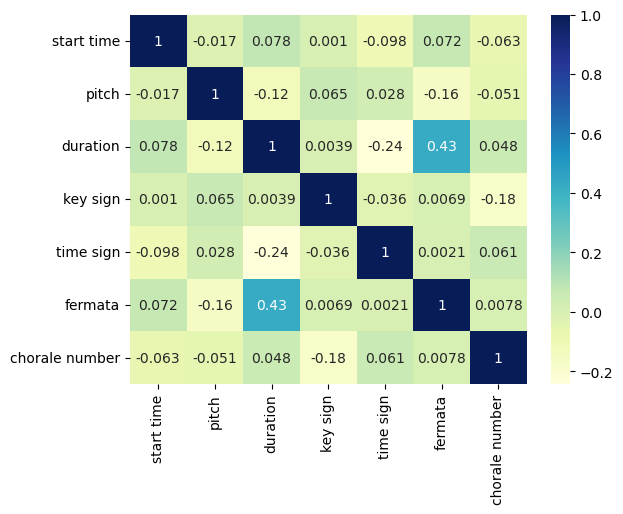

In [108]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [180]:
bin_set = [20, 20, 20, 20, 10, 10]
print(bin_set)
bins_series = [[0,420],[60, 78],[0,16],[-4,4],[12,16],[0,1]]
bin_width = [60, 2, 1, 1, 2, 1]

[20, 20, 20, 20, 10, 10]


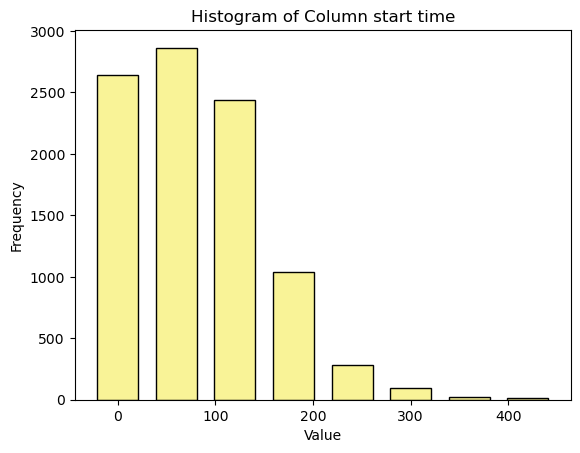

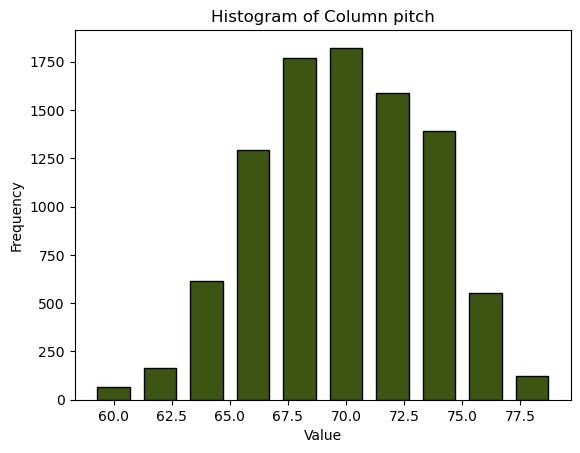

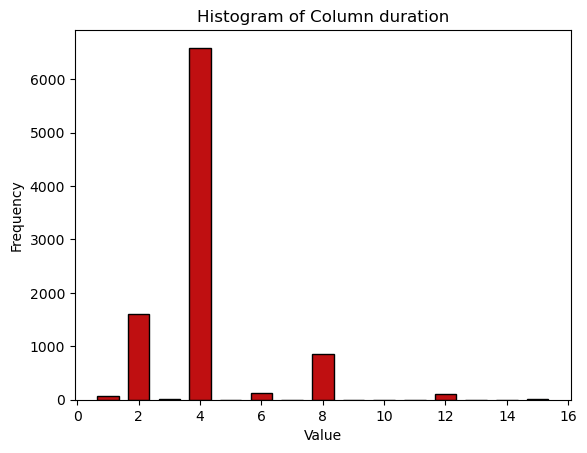

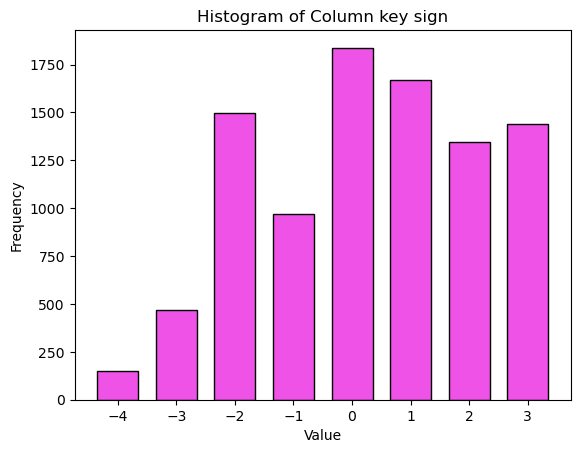

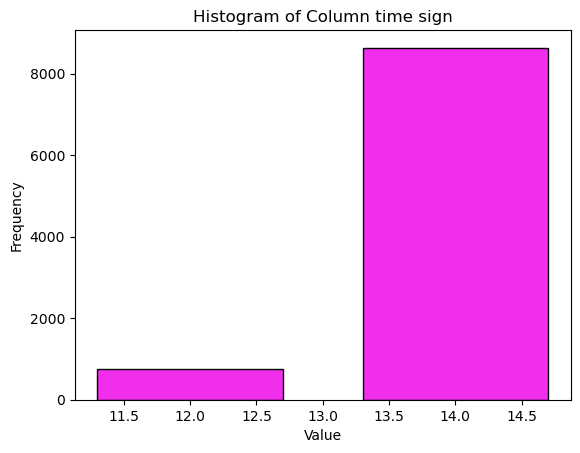

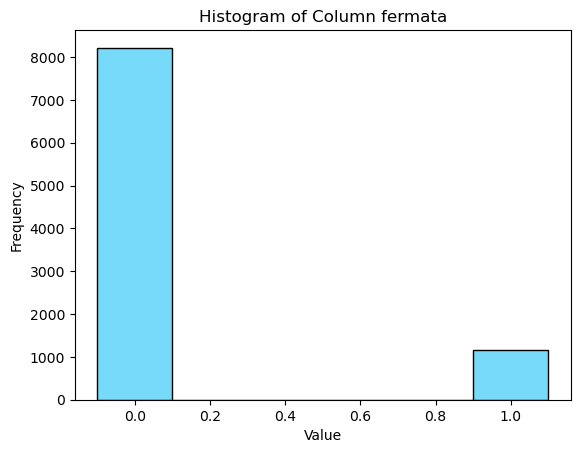

In [181]:
import matplotlib.pyplot as plt

i = 0
while i < 6:
  random_color = np.random.rand(3)
  plt_data = data.iloc[:, i]
  binwidth = bin_width[i]
  if i == 5:
    plt.hist(plt_data, color=random_color, edgecolor='k',bins=[-0.1,0.1,0.9,1.1])#, align='mid', bins=2, rwidth=0.5)#, bins=range(1,7)
  else:
    plt.hist(plt_data, color=random_color, edgecolor='k', bins=range(min(plt_data), max(plt_data) + binwidth, binwidth), align='left', rwidth = 0.7)#, bins=range(1,7)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of Column {col_name[i]}')
  plt.show()
  i += 1

In [172]:
max_value = data[['time sign']].max()
print("The max time sign is: " + str(max_value.iloc[0]))

The max time sign is: 16


In [182]:
print(data.isnull().sum())

start time        0
pitch             0
duration          0
key sign          0
time sign         0
fermata           0
chorale number    0
dtype: int64


In [12]:
# next step is to reorder the notes
import pandas as pd
data = pd.read_csv(file_path_out, sep=" ", header=0)
data.shape
data.head(10)

,start time,pitch,duration,key sign,time sign,fermata,chorale number
0,8,67,4,1,12,0,1
1,12,67,8,1,12,0,1
2,20,74,4,1,12,0,1
3,24,71,6,1,12,0,1
4,30,69,2,1,12,0,1
5,32,67,4,1,12,0,1
6,36,67,6,1,12,0,1
7,42,69,2,1,12,0,1
8,44,71,4,1,12,0,1
9,48,69,8,1,12,1,1


In [13]:
data[['n1 start time', 'n1 pitch', 'n1 duration', 'n1 key sign', 'n1 time sign', 'n1 fermata', 'n1 chorale number']] = data[['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number']].shift(-1)
data[['n2 start time', 'n2 pitch', 'n2 duration', 'n2 key sign', 'n2 time sign', 'n2 fermata', 'n2 chorale number']] = data[['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number']].shift(-2)
data[['n3 start time', 'n3 pitch', 'n3 duration', 'n3 key sign', 'n3 time sign', 'n3 fermata', 'n3 chorale number']] = data[['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number']].shift(-3)
data

,start time,pitch,duration,key sign,time sign,fermata,chorale number,n1 start time,n1 pitch,n1 duration,...,n2 time sign,n2 fermata,n2 chorale number,n3 start time,n3 pitch,n3 duration,n3 key sign,n3 time sign,n3 fermata,n3 chorale number
0,8,67,4,1,12,0,1,12.0,67.0,8.0,...,12.0,0.0,1.0,24.0,71.0,6.0,1.0,12.0,0.0,1.0
1,12,67,8,1,12,0,1,20.0,74.0,4.0,...,12.0,0.0,1.0,30.0,69.0,2.0,1.0,12.0,0.0,1.0
2,20,74,4,1,12,0,1,24.0,71.0,6.0,...,12.0,0.0,1.0,32.0,67.0,4.0,1.0,12.0,0.0,1.0
3,24,71,6,1,12,0,1,30.0,69.0,2.0,...,12.0,0.0,1.0,36.0,67.0,6.0,1.0,12.0,0.0,1.0
4,30,69,2,1,12,0,1,32.0,67.0,4.0,...,12.0,0.0,1.0,42.0,69.0,2.0,1.0,12.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,140,72,4,0,16,0,285,144.0,74.0,2.0,...,16.0,0.0,285.0,148.0,71.0,8.0,0.0,16.0,0.0,285.0
9382,144,74,2,0,16,0,285,146.0,72.0,2.0,...,16.0,0.0,285.0,156.0,69.0,4.0,0.0,16.0,1.0,285.0
9383,146,72,2,0,16,0,285,148.0,71.0,8.0,...,16.0,1.0,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9384,148,71,8,0,16,0,285,156.0,69.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
data.shape

(9386, 28)

In [14]:
# keep the rows which contains the notes in the same song
mask = data['chorale number']==data['n3 chorale number']
data[mask]

,start time,pitch,duration,key sign,time sign,fermata,chorale number,n1 start time,n1 pitch,n1 duration,...,n2 time sign,n2 fermata,n2 chorale number,n3 start time,n3 pitch,n3 duration,n3 key sign,n3 time sign,n3 fermata,n3 chorale number
0,8,67,4,1,12,0,1,12.0,67.0,8.0,...,12.0,0.0,1.0,24.0,71.0,6.0,1.0,12.0,0.0,1.0
1,12,67,8,1,12,0,1,20.0,74.0,4.0,...,12.0,0.0,1.0,30.0,69.0,2.0,1.0,12.0,0.0,1.0
2,20,74,4,1,12,0,1,24.0,71.0,6.0,...,12.0,0.0,1.0,32.0,67.0,4.0,1.0,12.0,0.0,1.0
3,24,71,6,1,12,0,1,30.0,69.0,2.0,...,12.0,0.0,1.0,36.0,67.0,6.0,1.0,12.0,0.0,1.0
4,30,69,2,1,12,0,1,32.0,67.0,4.0,...,12.0,0.0,1.0,42.0,69.0,2.0,1.0,12.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378,132,71,4,0,16,0,285,136.0,69.0,2.0,...,16.0,0.0,285.0,140.0,72.0,4.0,0.0,16.0,0.0,285.0
9379,136,69,2,0,16,0,285,138.0,71.0,2.0,...,16.0,0.0,285.0,144.0,74.0,2.0,0.0,16.0,0.0,285.0
9380,138,71,2,0,16,0,285,140.0,72.0,4.0,...,16.0,0.0,285.0,146.0,72.0,2.0,0.0,16.0,0.0,285.0
9381,140,72,4,0,16,0,285,144.0,74.0,2.0,...,16.0,0.0,285.0,148.0,71.0,8.0,0.0,16.0,0.0,285.0


In [1]:
data[mask].to_csv('modified_file.txt', sep='\t', index=False)

NameError: name 'data' is not defined

In [218]:
c = data[['chorale number']].value_counts()
print(c)

chorale number
58                172
119               164
7                 164
69                162
5                 156
                 ... 
42                 64
161                64
57                 62
151                58
6                  52
Length: 100, dtype: int64


In [5]:
import pandas as pd
newdata = pd.read_csv('modified_file.txt', sep="\t", header=0)
newdata.shape

ModuleNotFoundError: No module named 'pandas'

<Axes: >

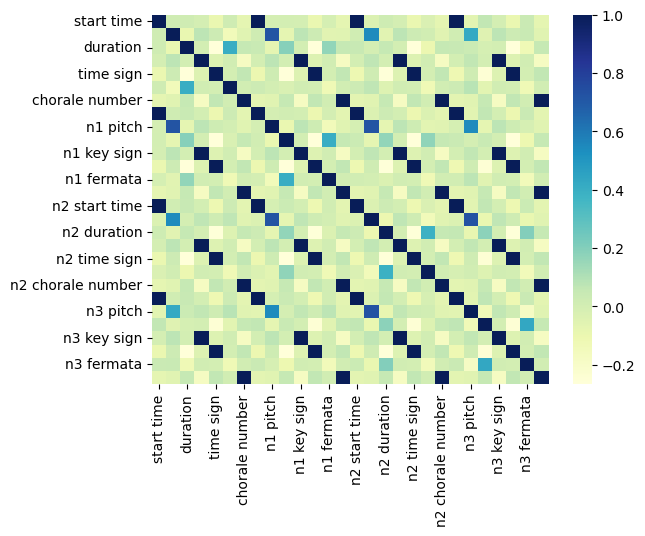

In [17]:
import seaborn as sns
sns.heatmap(newdata.corr(), cmap="YlGnBu")

In [11]:
# columns_same = newdata[['time sign']]==newdata[['n1 time sign']] # got wrong result
columns_same = (newdata.iloc[:, 4].values == newdata.iloc[:, 25].values).all()
print(columns_same)
# in one song, only one time sign

True


In [12]:
# columns_same = newdata[['key sign']].equals(newdata[['n1 key sign']])
columns_same = (newdata.iloc[:, 3].values == newdata.iloc[:, 24].values).all()
print(columns_same)
# in one song, only one key sign

True


In [213]:
9386-8786

600

In [214]:
285*3

855

The columns names are: 

'start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata',
       'chorale number'
       
The output should be n3 pitch, n3 duration, n3 fermata.

Accuracy is a metric that measures the proportion of correctly classified instances among the total instances.

In [3]:
# Convert target to categorical
newdata[['n3 pitch']] = newdata[['n3 pitch']].astype('category')
newdata[['n3 duration']] = newdata[['n3 duration']].astype('category')
newdata[['n3 fermata']] = newdata[['n3 fermata']].astype('category')

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = newdata[['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number', 'n1 start time', 'n1 pitch', 'n1 duration', 'n1 key sign', 'n1 time sign', 'n1 fermata', 'n1 chorale number', 'n2 start time', 'n2 pitch', 'n2 duration', 'n2 key sign', 'n2 time sign', 'n2 fermata', 'n2 chorale number']]
y = newdata[['n3 pitch', 'n3 duration', 'n3 fermata']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# standardize the predictors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
import numpy as np

# Linear Regression for multi-output
linear_regression = LinearRegression()
multi_output_linear_regression = MultiOutputRegressor(linear_regression)

# Fit the model on the training data
multi_output_linear_regression.fit(X_train, y_train)

# Make predictions on the test data
predictions_linear = np.round(multi_output_linear_regression.predict(X_test))

print("Coefficients:")
print("Coefficient for target 1:", multi_output_linear_regression.estimators_[0].coef_)
print("Coefficient for target 2:", multi_output_linear_regression.estimators_[1].coef_)
print("Coefficient for target 3:", multi_output_linear_regression.estimators_[2].coef_)

# Evaluate the accuracy for each target separately
accuracy_target1_lr = accuracy_score(y_test['n3 pitch'], predictions_linear[:, 0])
accuracy_target2_lr = accuracy_score(y_test['n3 duration'], predictions_linear[:, 1])
accuracy_target3_lr = accuracy_score(y_test['n3 fermata'], predictions_linear[:, 2])

print(f'Linear regression Classifier - Accuracy Target 1: {accuracy_target1_lr}')
print(f'Linear regression Classifier - Accuracy Target 2: {accuracy_target2_lr}')
print(f'Linear regression Classifier - Accuracy Target 3: {accuracy_target3_lr}')

Coefficients:
Coefficient for target 1: [-1.66961438e+00  1.15908473e-01 -6.61135979e-03 -4.66968018e-04
 -2.56441257e-02  2.14339338e-01 -2.00375430e-02  1.20649350e+00
  9.16673965e-02 -4.80421737e-02 -4.66968018e-04 -2.56441257e-02
  3.71657995e-01 -2.00375430e-02  3.55161423e-01  2.41233205e+00
 -2.50624936e-01 -4.66968018e-04 -2.56441257e-02  5.76685222e-01
 -2.00375430e-02]
Coefficient for target 2: [-0.48919044  0.03653694 -0.13129445  0.01429672 -0.13683455 -0.08966349
  0.03910002  0.64725808 -0.07833822  0.03547199  0.01429672 -0.13683455
 -0.13213117  0.03910002 -0.08903269 -0.11234483  0.30943247  0.01429672
 -0.13683455 -0.26711757  0.03910002]
Coefficient for target 3: [-0.06013296  0.04350685 -0.0245181   0.0018628   0.00767431 -0.03905874
  0.00030271  0.05701291 -0.00880133 -0.0037973   0.0018628   0.00767431
 -0.05515028  0.00030271  0.01312844 -0.05160186  0.11109467  0.0018628
  0.00767431 -0.11267714  0.00030271]
Linear regression Classifier - Accuracy Target 1: 0.

LDA

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis (LDA) for multi-output
lda_classifier = LinearDiscriminantAnalysis()
multi_output_lda_classifier = MultiOutputClassifier(lda_classifier)

# Fit the model on the training data
multi_output_lda_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_lda = multi_output_lda_classifier.predict(X_test)

# Evaluate the accuracy for each target separately
accuracy_target1_lda = accuracy_score(y_test['n3 pitch'], predictions_lda[:, 0])
accuracy_target2_lda = accuracy_score(y_test['n3 duration'], predictions_lda[:, 1])
accuracy_target3_lda = accuracy_score(y_test['n3 fermata'], predictions_lda[:, 2])

print(f'LDA Classifier - Accuracy Target 1: {accuracy_target1_lda}')
print(f'LDA Classifier - Accuracy Target 2: {accuracy_target2_lda}')
print(f'LDA Classifier - Accuracy Target 3: {accuracy_target3_lda}')

LDA Classifier - Accuracy Target 1: 0.2992036405005688
LDA Classifier - Accuracy Target 2: 0.6734926052332195
LDA Classifier - Accuracy Target 3: 0.8987485779294653


Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier for multi-output
logistic_regression_classifier = LogisticRegression(max_iter=100000)
multi_output_logistic_regression_classifier = MultiOutputClassifier(logistic_regression_classifier)

# Fit the model on the training data
multi_output_logistic_regression_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_logistic = multi_output_logistic_regression_classifier.predict(X_test)

# Evaluate the accuracy for each target separately
accuracy_target1_logistic = accuracy_score(y_test['n3 pitch'], predictions_logistic[:, 0])
accuracy_target2_logistic = accuracy_score(y_test['n3 duration'], predictions_logistic[:, 1])
accuracy_target3_logistic = accuracy_score(y_test['n3 fermata'], predictions_logistic[:, 2])

print(f'Logistic Regression Classifier - Accuracy Target 1: {accuracy_target1_logistic}')
print(f'Logistic Regression Classifier - Accuracy Target 2: {accuracy_target2_logistic}')
print(f'Logistic Regression Classifier - Accuracy Target 3: {accuracy_target3_logistic}')

Logistic Regression Classifier - Accuracy Target 1: 0.3111490329920364
Logistic Regression Classifier - Accuracy Target 2: 0.7252559726962458
Logistic Regression Classifier - Accuracy Target 3: 0.8981797497155859


Decision Tree

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_text

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

# Define parameter grid for tuning (e.g., max_depth)
param_grid = {'max_depth': [3, 5, 7]}

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the model with the best hyperparameters on the entire training set
best_dt_regressor = grid_search.best_estimator_
best_dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = np.round(best_dt_regressor.predict(X_test))

# Print the final decision tree
tree_rules = export_text(best_dt_regressor, feature_names=list(X.columns))
print("Final Decision Tree:")
print(tree_rules)

# Perform cross-validation and print mean score
cv_score = cross_val_score(best_dt_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Score:", cv_score.mean())


Best Hyperparameters: {'max_depth': 7}
Final Decision Tree:
|--- n2 pitch <= -0.02
|   |--- n2 pitch <= -0.60
|   |   |--- n2 fermata <= 1.24
|   |   |   |--- n2 pitch <= -1.18
|   |   |   |   |--- n1 pitch <= -0.59
|   |   |   |   |   |--- n2 duration <= 1.68
|   |   |   |   |   |   |--- n1 time sign <= -1.55
|   |   |   |   |   |   |   |--- value: [66.97, 7.55, 0.19]
|   |   |   |   |   |   |--- n1 time sign >  -1.55
|   |   |   |   |   |   |   |--- value: [65.43, 4.44, 0.26]
|   |   |   |   |   |--- n2 duration >  1.68
|   |   |   |   |   |   |--- n1 pitch <= -2.62
|   |   |   |   |   |   |   |--- value: [71.00, 4.00, 1.00]
|   |   |   |   |   |   |--- n1 pitch >  -2.62
|   |   |   |   |   |   |   |--- value: [63.88, 6.82, 0.84]
|   |   |   |   |--- n1 pitch >  -0.59
|   |   |   |   |   |--- n2 duration <= -0.63
|   |   |   |   |   |   |--- pitch <= 0.42
|   |   |   |   |   |   |   |--- value: [67.00, 2.08, 0.00]
|   |   |   |   |   |   |--- pitch >  0.42
|   |   |   |   |   |   |  

In [17]:
accuracy_target1 = accuracy_score(y_test['n3 pitch'], predictions[:, 0])
accuracy_target2 = accuracy_score(y_test['n3 duration'], predictions[:, 1])
accuracy_target3 = accuracy_score(y_test['n3 fermata'], predictions[:, 2])

print(f'Accuracy Target 1: {accuracy_target1}')
print(f'Accuracy Target 2: {accuracy_target2}')
print(f'Accuracy Target 3: {accuracy_target3}')

Accuracy Target 1: 0.15756541524459614
Accuracy Target 2: 0.6097838452787259
Accuracy Target 3: 0.8839590443686007


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier for multi-output
classifier = DecisionTreeClassifier()
multi_output_classifier = MultiOutputClassifier(classifier)

# Fit the model on the training data
multi_output_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = multi_output_classifier.predict(X_test)

# Evaluate the accuracy for each target separately
accuracy_target1 = accuracy_score(y_test['n3 pitch'], predictions[:, 0])
accuracy_target2 = accuracy_score(y_test['n3 duration'], predictions[:, 1])
accuracy_target3 = accuracy_score(y_test['n3 fermata'], predictions[:, 2])

print(f'Accuracy Target 1: {accuracy_target1}')
print(f'Accuracy Target 2: {accuracy_target2}')
print(f'Accuracy Target 3: {accuracy_target3}')

Accuracy Target 1: 0.8816837315130831
Accuracy Target 2: 0.931740614334471
Accuracy Target 3: 0.9749715585893061


Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier for multi-output
rf_classifier = RandomForestClassifier()
multi_output_rf_classifier = MultiOutputClassifier(rf_classifier)

# Fit the model on the training data
multi_output_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_rf = multi_output_rf_classifier.predict(X_test)

# Evaluate the accuracy for each target separately
accuracy_target1_rf = accuracy_score(y_test[['n3 pitch']], predictions_rf[:, 0])
accuracy_target2_rf = accuracy_score(y_test[['n3 duration']], predictions_rf[:, 1])
accuracy_target3_rf = accuracy_score(y_test[['n3 fermata']], predictions_rf[:, 2])

print(f'Random Forest Classifier - Accuracy Target 1: {accuracy_target1_rf}')
print(f'Random Forest Classifier - Accuracy Target 2: {accuracy_target2_rf}')
print(f'Random Forest Classifier - Accuracy Target 3: {accuracy_target3_rf}')


Random Forest Classifier - Accuracy Target 1: 0.8805460750853242
Random Forest Classifier - Accuracy Target 2: 0.949943117178612
Random Forest Classifier - Accuracy Target 3: 0.9852104664391353


KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

X = newdata[['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number', 'n1 start time', 'n1 pitch', 'n1 duration', 'n1 key sign', 'n1 time sign', 'n1 fermata', 'n1 chorale number', 'n2 start time', 'n2 pitch', 'n2 duration', 'n2 key sign', 'n2 time sign', 'n2 fermata', 'n2 chorale number']].to_numpy()
y = newdata[['n3 pitch', 'n3 duration', 'n3 fermata']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier for multi-output
knn_classifier = KNeighborsClassifier()
multi_output_knn_classifier = MultiOutputClassifier(knn_classifier)

# Fit the model on the training data
multi_output_knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_knn = multi_output_knn_classifier.predict(X_test)

# Evaluate the accuracy for each target separately
accuracy_target1_knn = accuracy_score(y_test[:, 0], predictions_knn[:, 0])
accuracy_target2_knn = accuracy_score(y_test[:, 1], predictions_knn[:, 1])
accuracy_target3_knn = accuracy_score(y_test[:, 2], predictions_knn[:, 2])

print(f'K-Nearest Neighbors Classifier - Accuracy Target 1: {accuracy_target1_knn}')
print(f'K-Nearest Neighbors Classifier - Accuracy Target 2: {accuracy_target2_knn}')
print(f'K-Nearest Neighbors Classifier - Accuracy Target 3: {accuracy_target3_knn}')

K-Nearest Neighbors Classifier - Accuracy Target 1: 0.22468714448236632
K-Nearest Neighbors Classifier - Accuracy Target 2: 0.7064846416382252
K-Nearest Neighbors Classifier - Accuracy Target 3: 0.8572241183162684


Neural network

In [51]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/22/50/1e211cbb5e1f52e55eeae1605789c9d24403962d37581cf0deb3e6b33377/tensorflow-2.14.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/c9/ea/fe2a69cc6cfebf7c7ee8a6357566fc1cbb91632bde5869b669a396accb5f/libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl.metadat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.3/183

In [53]:
from tensorflow import keras
from tensorflow.keras import layers


# Build a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='sigmoid')  # Output layer with 3 neurons for 3 targets
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test data
predictions_nn = model.predict(X_test)

# Convert probabilities to binary predictions
binary_predictions_nn = (predictions_nn > 0.5).astype(int)

# Evaluate the accuracy for each target separately
accuracy_target1_nn = accuracy_score(y_test[['n3 pitch']], binary_predictions_nn[:, 0])
accuracy_target2_nn = accuracy_score(y_test[['n3 duration']], binary_predictions_nn[:, 1])
accuracy_target3_nn = accuracy_score(y_test[['n3 fermata']], binary_predictions_nn[:, 2])

print(f'Neural Network - Accuracy Target 1: {accuracy_target1_nn}')
print(f'Neural Network - Accuracy Target 2: {accuracy_target2_nn}')
print(f'Neural Network - Accuracy Target 3: {accuracy_target3_nn}')

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: -653.3094 - accuracy: 0.9628 - val_loss: -2554.4878 - val_accuracy: 1.0000
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: -10628.0977 - accuracy: 1.0000 - val_loss: -23379.3223 - val_accuracy: 1.0000
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: -50285.2734 - accuracy: 1.0000 - val_loss: -83727.7188 - val_accuracy: 1.0000
Epoch 4/50
176/176 [==============================] - 0s 1ms/step - loss: -139714.8438 - accuracy: 1.0000 - val_loss: -201189.7344 - val_accuracy: 1.0000
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: -295118.4688 - accuracy: 1.0000 - val_loss: -389880.6250 - val_accuracy: 1.0000
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: -529413.5000 - accuracy: 1.0000 - val_loss: -661702.3750 - val_accuracy: 1.0000
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: -854646.937

In [54]:
pip install music21 midi2audio

  Obtaining dependency information for music21 from https://files.pythonhosted.org/packages/a1/1b/ef7bdf01df19cc7ac9294531a9c991c6d382bde6bc15c9d106b9a5e547ef/music21-9.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonpickle from https://files.pythonhosted.org/packages/d3/25/6e0a450430b7aa194b0f515f64820fc619314faa289458b7dfca4a026114/jsonpickle-3.0.2-py3-none-any.whl.metadata
  Using cached webcolors-1.13-py3-none-any.whl (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [57]:
X = newdata[['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number', 'n1 start time', 'n1 pitch', 'n1 duration', 'n1 key sign', 'n1 time sign', 'n1 fermata', 'n1 chorale number', 'n2 start time', 'n2 pitch', 'n2 duration', 'n2 key sign', 'n2 time sign', 'n2 fermata', 'n2 chorale number']]
y = newdata[['n3 pitch', 'n3 duration', 'n3 fermata']]

# Random Forest Classifier for multi-output
rf_classifier = RandomForestClassifier()
multi_output_rf_classifier = MultiOutputClassifier(rf_classifier)

# Fit the model on the training data
multi_output_rf_classifier.fit(X, y)


MultiOutputClassifier(estimator=RandomForestClassifier())

In [59]:
import joblib

# Assuming you have a Random Forest model named random_forest_model
joblib.dump(multi_output_rf_classifier, 'multi_output_rf_classifier.pkl')

# generate a trained model, later this can be use directly

['multi_output_rf_classifier.pkl']

In [61]:
pip install mido

  Obtaining dependency information for mido from https://files.pythonhosted.org/packages/b0/0e/b551e09391220208764c00ed2b382e198414329d8b6037eeb54a8008d737/mido-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pygame

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/c8/db/db5a6567791d26d610b2c25cbf74be527857b6dff68e566d57bd7954ece6/pygame-2.5.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 25.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
# test
import pandas as pd

# Your list data
data_list = [
    ['Alice', 25, 'Engineer']
]

# Define column names
columns = ['Name', 'Age', 'Occupation']

# Convert list to pandas DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df[2])

0    Engineer
Name: 2, dtype: object


In [36]:
import collections
import joblib
from itertools import chain
import numpy as np

# Load pre-trained Random Forest model
model = joblib.load('multi_output_rf_classifier.pkl')

#'start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number',
# Define a function to generate chorale
def generate_chorale(initial_notes, time_signature, key_signature, chorale_length):
    start_time = 1
    note_deque = collections.deque() # to store three notes -> predict the 4th note

    ret = []
    
    i = 0
    while start_time < 4:
        # add to return
        ret.append(initial_notes[i])
        
        note = []
        note.append(start_time)
        note.append(initial_notes[i][0])
        note.append(initial_notes[i][1])
        note.append(key_signature)
        note.append(time_signature)
        note.append(initial_notes[i][2])
        note.append(1)
        note_deque.append(note)
        flattened_notes = list(chain(*note_deque))
        print(flattened_notes)
        start_time += 1
    
    while start_time <= chorale_length:
        flattened_notes = list(chain(*note_deque))
        formatted_notes = np.array(flattened_notes).reshape(1, -1)
        col_names = ['start time', 'pitch', 'duration', 'key sign', 'time sign', 'fermata', 'chorale number', 'n1 start time', 'n1 pitch', 'n1 duration', 'n1 key sign', 'n1 time sign', 'n1 fermata', 'n1 chorale number', 'n2 start time', 'n2 pitch', 'n2 duration', 'n2 key sign', 'n2 time sign', 'n2 fermata', 'n2 chorale number']
        next_note = model.predict(pd.DataFrame(formatted_notes, columns=col_names))
        
        formatted_next_note = []
        formatted_next_note.append(start_time)
        formatted_next_note.append(int(next_note[0][0]))
        formatted_next_note.append(int(next_note[0][1]))
        formatted_next_note.append(key_signature)
        formatted_next_note.append(time_signature)
        formatted_next_note.append(int(next_note[0][2]))
        formatted_next_note.append(1)
        
        ret_next_note = []
        ret_next_note.append(int(next_note[0][0]))
        ret_next_note.append(int(next_note[0][1]))
        ret_next_note.append(int(next_note[0][2]))
        
        # add to return
        ret.append(ret_next_note)
        
        # add to deque
        note_deque.popleft()
        note_deque.append(formatted_next_note)
        
        start_time += 1
    
    return ret
    
first_three_notes = [[67, 4, 0], [67, 4, 0], [69, 4, 0]]
generated_chorale = generate_chorale(first_three_notes, 12, 1, 50)
print(generated_chorale)  

[1, 67, 4, 1, 12, 0, 1]
[1, 67, 4, 1, 12, 0, 1, 2, 67, 4, 1, 12, 0, 1]
[1, 67, 4, 1, 12, 0, 1, 2, 67, 4, 1, 12, 0, 1, 3, 67, 4, 1, 12, 0, 1]
[[67, 4, 0], [67, 4, 0], [67, 4, 0], [69, 6, 0], [71, 2, 0], [69, 4, 0], [67, 6, 0], [67, 2, 0], [69, 4, 0], [71, 6, 0], [69, 2, 0], [67, 4, 0], [67, 6, 0], [69, 2, 0], [71, 4, 0], [69, 8, 0], [67, 4, 0], [67, 6, 0], [69, 2, 0], [71, 4, 0], [69, 8, 0], [67, 4, 0], [67, 6, 0], [69, 2, 0], [71, 4, 0], [69, 8, 0], [67, 4, 1], [67, 4, 0], [69, 4, 0], [71, 4, 0], [69, 8, 0], [67, 4, 1], [67, 4, 0], [69, 4, 0], [71, 4, 0], [69, 8, 0], [67, 4, 1], [71, 4, 0], [71, 4, 0], [72, 4, 0], [71, 4, 0], [69, 4, 0], [67, 8, 0], [67, 8, 1], [71, 4, 0], [71, 4, 0], [72, 4, 0], [74, 4, 0], [72, 4, 0], [71, 4, 0]]


In [38]:
import mido
from mido import MidiFile, MidiTrack, Message
import pygame

def generate_midi(melody):
    midi = MidiFile()
    track = MidiTrack()
    midi.tracks.append(track)

    for note, duration, fermata in melody:
        # Note On message
        track.append(Message('note_on', note=note, velocity=64, time=0))

        # Note Off message after the specified duration
        if fermata:
            dur = int(duration * 140 * 2)
        else:
            dur = int(duration * 140)
        track.append(Message('note_off', note=note, velocity=64, time=dur))  # Assuming 480 ticks per beat

    return midi

def play_midi(midi_file):
    pygame.init()
    pygame.mixer.music.load(midi_file)
    pygame.mixer.music.play()

    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(30)

    pygame.mixer.quit()

# Example Melody: Each tuple represents (note, duration) where note is MIDI note number
# melody = [
#     (60, 0.5),  # C4
#     (62, 0.5),  # D4
#     (64, 0.5),  # E4
#     (65, 0.5),  # F4
#     (67, 0.5),  # G4
#     (69, 0.5),  # A4
#     (71, 0.5),  # B4
#     (72, 0.5),  # C5
# ]

melody = generated_chorale

# Generate and save the MIDI file
midi_file = generate_midi(melody)
midi_file.save('output.mid')

# Play the generated MIDI file
play_midi('output.mid')
